AILIU CHENG   使用神经网络和深度学习的分类

我们调整核大小为3*3
分析测试后的准确度、损失率和epoch次数
并绘制出相关图像

In [2]:
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from matplotlib import pyplot as plt
from warnings import filterwarnings

filterwarnings(action='ignore')

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(6, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(
                  lr=0.1, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 9s 18ms/step - loss: 0.7900 - accuracy: 0.7718 - val_loss: 0.2380 - val_accuracy: 0.9309
Epoch 2/12
469/469 [==============================] - 8s 18ms/step - loss: 0.2094 - accuracy: 0.9387 - val_loss: 0.1656 - val_accuracy: 0.9493
Epoch 3/12
469/469 [==============================] - 8s 17ms/step - loss: 0.1601 - accuracy: 0.9530 - val_loss: 0.1427 - val_accuracy: 0.9569
Epoch 4/12
469/469 [==============================] - 8s 16ms/step - loss: 0.1336 - accuracy: 0.9607 - val_loss: 0.1079 - val_accuracy: 0.9675
Epoch 5/12
469/469 [==============================] - 8s 17ms/step - loss: 0.1153 - accuracy: 0.9650 - val_loss: 0.0942 - val_accuracy: 0.9727
Epoch 6/12
469/469 [==============================] - 8s 18ms/step - loss: 0.1016 - accuracy: 0.9691 - val_loss: 0.0860 - val_accuracy: 0.9746
Epoch 7/12
469/469 [==============================] - 9s 18ms/step - loss: 0.0915 - accuracy: 0.9724 - val_loss: 0.0781 - val_accuracy: 0.9759

我们可以发现，
3*3核大小的损失率和准确度是：
Test loss: 0.05953213572502136
Test accuracy: 0.9811000227928162
5*5核大小的损失率和准确度是：
Test loss: 0.05523701757192612
Test accuracy: 0.9817000031471252

所以，随着核大小的调整，损失率下降，准确率提升。

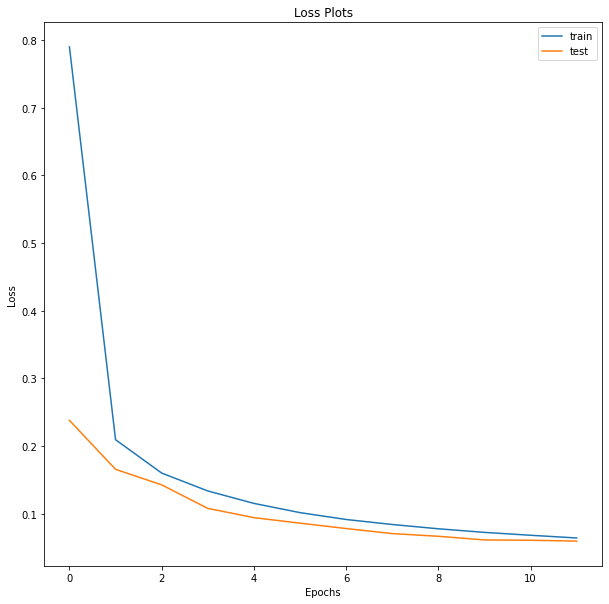

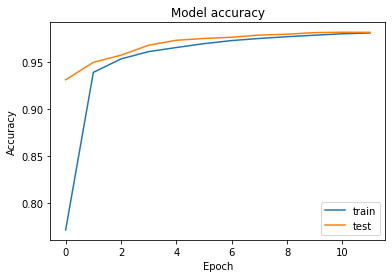

In [4]:
fig = plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Plots")
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()